## Import the dependencies

In [1]:
import os
import sys
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt

# set the main directory to import qel instruments drivers
sys.path.append(os.getcwd().replace('\\documents\\measure_notebooks',''))

In [2]:
from instruments.Tektronix_AWG5208.funcs import gauss, exp_rising, domain_trans
from instruments.Tektronix_AWG5208.plot_tools import *
from instruments.Tektronix_AWG5208.TektronixAWG_core import Tektronix_AWG5208
from instruments.Tektronix_AWG5208.TektronixAWG_waveformEditor import Waveform as Wave
from instruments.Tektronix_AWG5208.TektronixAWG_sequenceEditor import Time_Domain_Sequence

## Get the more details abount the specified object by  using "help" function 

In [ ]:
# help(Time_Domain_Sequence)
# help(Tektronix_AWG5208)
# print(dir(Tektronix_AWG5208))

## Generate a waveform with a single gaussian

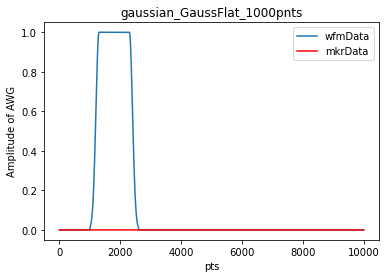

{'mkrData': array([0., 0., 0., ..., 0., 0., 0.]),
 'mkr_tone': 'no_mkr',
 'wfmData': array([0., 0., 0., ..., 0., 0., 0.]),
 'wfm_name': 'gaussian_GaussFlat_1000pnts'}


In [3]:
sg = Time_Domain_Sequence()
wfm_characteristic_name = 'Gaussian'
wfm_totlen = 10000
wfm_offset = 1000
gauss_sig = 100
gauss_flat = 1000
mkr_duration = 0
mkr_tone = 'no_mkr'

result = sg.gen_gauss_wfmdata('gaussian', 
                                wfm_totlen,
                                wfm_offset,
                                gauss_sig,
                                gauss_flat,
                                mkr_duration,
                                mkr_tone)

plt_wfmData_with_mkrData(result)
pp.pprint(result)

## Demonstrate a wfmData for exp_rising with mkrData

In [ ]:
# sampling_rate = 10**9                                               # awg sampling rate
# tau = 600*10**-9                                                    # characteristic time
# t0 = 2600*10**-9                                                    # start value(second)
# one_sequence = 10*10**-6                                            # duration within 10 microsec
# total_pts = int(one_sequence*sampling_rate)
# waveform_pos = np.linspace(0,total_pts,total_pts+1)                 # construct the point scale from 0 to 10000
# time = np.linspace(0,one_sequence,total_pts+1)                      # construct the time scale in one_sequence(unit:1e-9)

# #domain transform 
# tau_pos = int(tau*sampling_rate)
# t0_pos = domain_trans(t0, time, waveform_pos,                       # scale convert from time scale(1ns)
#                       sampling_rate, typ="time-pos")                # to point scale

# delta_t = waveform_pos[:t0_pos]-np.linspace(t0_pos,t0_pos,t0_pos)
# pulse = exp_rising(delta_t, tau_pos)
# wfmData = np.zeros(total_pts)
# wfmData[:t0_pos] = pulse


# result = {'mkrData':np.zeros(len(wfmData)), 'mkr_tone':'no_mkr',
#          'wfmData':wfmData, 'wfm_name':'exp_rising_by_edward'}

# plt_wfmData_with_mkrData(result)
# plt.show()

## Generate a rabi-sequence with several variety of waveforms

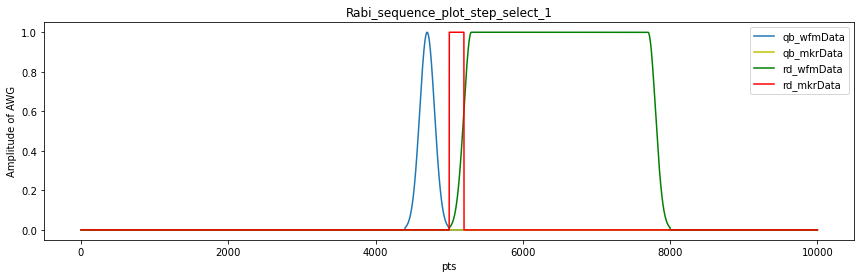

In [14]:
rbs =  Time_Domain_Sequence()

# define the initial condition for generating a rabi-sequence
wfm_amount = 10
wfm_totlen = 10000
gauss_sig = 100
gauss_delta_flat = 200
qubitDrive_mkrDuration = 0
qubitDrive_mkr = 'no_mkr'

readOut_offset = 5000
readOut_flat = 2400
readOut_mkrDuration = 200
readOut_mkr = 'mkr1'

# clean the temporary buffer
store_rabi_seq = {}

# set the initial condition for generating a rabi-sequence
store_rabi_seq = rbs.gen_Rabi_seq(wfm_amount,
                                wfm_totlen,
                                gauss_sig,
                                gauss_delta_flat,
                                qubitDrive_mkrDuration,
                                qubitDrive_mkr,
                                readOut_offset,
                                readOut_flat,
                                readOut_mkrDuration,
                                readOut_mkr)

# display the sequence stored structure
# pp.pprint(store_rabi_seq)

# plot the pulse shaping in the specified step
seq_name = 'Rabi_sequence'
step_select = 1
store_time_domain_seq = store_rabi_seq
plt_qb_rd(seq_name, step_select, store_time_domain_seq)



## Generate a T1-sequence with several variety of waveforms

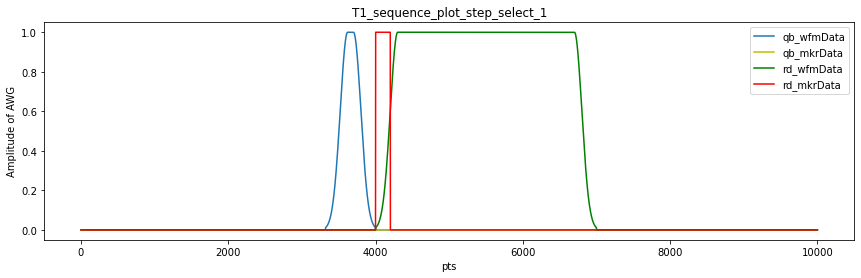

In [5]:
t1seq_obj = Time_Domain_Sequence()
# define the initial condition for generating a T1-sequence
wfm_amount = 10
wfm_totlen = 10000
gauss_sig = 100
qubitDrive_delay_time_delta = 100
qubitDrive_flat = 80
qubitDrive_mkrDuration = 0
qubitDrive_mkr = 'no_mkr'
readOut_offset = 4000
readOut_flat = 2400
readOut_mkrDuration = 200
readOut_mkr = 'mkr1'

# clean the temporary buffer
store_t1_seq = {}
# set the initial condition for generating a T1-sequence
store_t1_seq = t1seq_obj.gen_T1_seq(wfm_amount,
                             wfm_totlen,
                             gauss_sig,
                             qubitDrive_delay_time_delta,
                             qubitDrive_flat,
                             qubitDrive_mkrDuration,
                             qubitDrive_mkr,
                             readOut_offset,
                             readOut_flat,
                             readOut_mkrDuration,
                             readOut_mkr)
# display the sequence stored structure
# pp.pprint(store_t1_seq)

# plot the pulse shaping in the specified step
seq_name = 'T1_sequence'
step_select = 1
store_time_domain_seq = store_t1_seq
plt_qb_rd(seq_name, step_select, store_time_domain_seq)


## Generate a T2-ramsey-sequence with several variety of waveforms

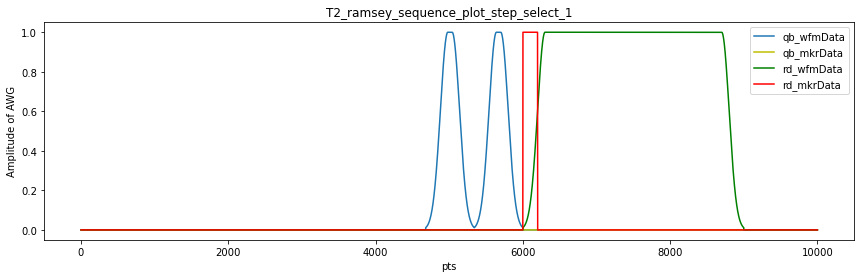

In [6]:
t2ramsey_seq_obj = Time_Domain_Sequence()
wfm_amount = 10
wfm_totlen = 10000
gauss_sig = 100

qubitDrive_delay_time_delta = 500
qubitDrive_flat = 60
qubitDrive_mkrDuration = 0
qubitDrive_mkr = 'no_mkr'

readOut_offset = 6000
readOut_flat = 2400
readOut_mkrDuration = 200
readOut_mkr = 'mkr1'

store_t2_ramsey_seq = {}

store_t2_ramsey_seq = t2ramsey_seq_obj.gen_T2_ramsey_seq(wfm_amount,
                                                        wfm_totlen,
                                                        gauss_sig,
                                                        qubitDrive_delay_time_delta,
                                                        qubitDrive_flat,
                                                        qubitDrive_mkrDuration,
                                                        qubitDrive_mkr,
                                                        readOut_offset,
                                                        readOut_flat,
                                                        readOut_mkrDuration,
                                                        readOut_mkr)
# pp.pprint(store_t2_ramsey_seq)

# plot the pulse shaping in the specified step
seq_name = 'T2_ramsey_sequence'
step_select = 1
store_time_domain_seq = store_t2_ramsey_seq
plt_qb_rd(seq_name, step_select, store_time_domain_seq)

## Generate a T2-Echo-sequence with several variety of waveforms

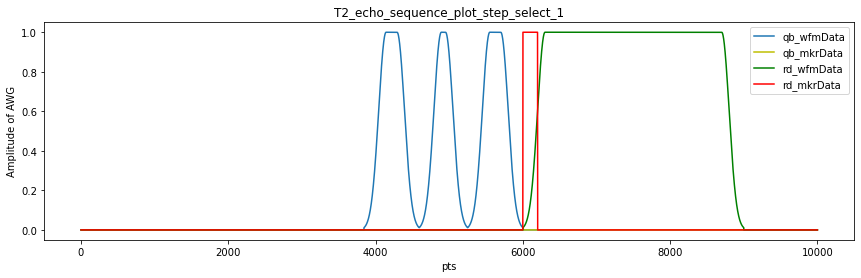

In [7]:
t2echo_seq_obj = Time_Domain_Sequence()
wfm_amount = 10
wfm_totlen = 10000
gauss_sig = 100

qubitDrive_delay_time_delta = 200
qubitDrive_flat_pi_divby2 = 58
qubitDrive_flat_pi = 150
qubitDrive_mkrDuration = 0
qubitDrive_mkr = 'no_mkr'

readOut_offset = 6000
readOut_flat = 2400
readOut_mkrDuration = 200
readOut_mkr = 'mkr1'

store_T2_echo_seq = {}

store_T2_echo_seq = t2echo_seq_obj.gen_T2_echo_seq(wfm_amount,
                                                wfm_totlen,
                                                gauss_sig,
                                                qubitDrive_delay_time_delta,
                                                qubitDrive_flat_pi_divby2,
                                                qubitDrive_flat_pi,
                                                qubitDrive_mkrDuration,
                                                qubitDrive_mkr,
                                                readOut_offset,
                                                readOut_flat,
                                                readOut_mkrDuration,
                                                readOut_mkr)
# pp.pprint(store_T2_echo_seq)

# plot the pulse shaping in the specified step
seq_name = 'T2_echo_sequence'
step_select = 1
store_time_domain_seq = store_T2_echo_seq
plt_qb_rd(seq_name, step_select, store_time_domain_seq)

##  Generate an EIT-sequence with several variety of waveforms

{'QubitDrive': {1: {'mkrData': array([0., 0., 0., ..., 0., 0., 0.]),
                    'mkr_tone': 'no_mkr',
                    'wfmData': array([0., 0., 0., ..., 0., 0., 0.]),
                    'wfm_name': 'QubitDrive_EIT_Index_1_GaussFlat1_1000_GaussFlat2_100pnts'},
                2: {'mkrData': array([0., 0., 0., ..., 0., 0., 0.]),
                    'mkr_tone': 'no_mkr',
                    'wfmData': array([0., 0., 0., ..., 0., 0., 0.]),
                    'wfm_name': 'QubitDrive_EIT_Index_2_GaussFlat1_1000_GaussFlat2_100pnts'}},
 'ReadOut': {1: {'mkrData': array([0., 0., 0., ..., 0., 0., 0.]),
                 'mkr_tone': 'mkr1',
                 'wfmData': array([0., 0., 0., ..., 0., 0., 0.]),
                 'wfm_name': 'ReadOut_EIT_Index_1_delay_1000pts_GaussFlat_2400pnts'},
             2: {'mkrData': array([0., 0., 0., ..., 0., 0., 0.]),
                 'mkr_tone': 'mkr1',
                 'wfmData': array([0., 0., 0., ..., 0., 0., 0.]),
                 'wfm_name'

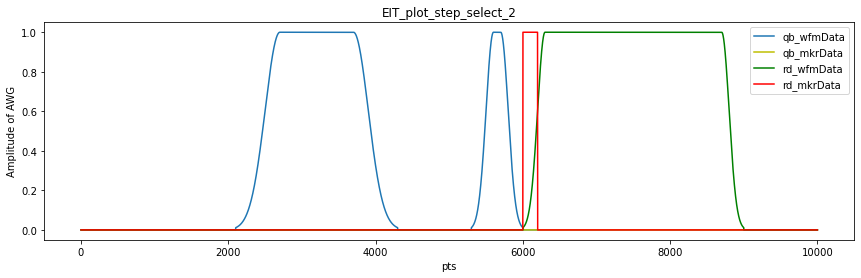

In [8]:
eit_seq_obj = Time_Domain_Sequence()
wfm_amount = 2
wfm_totlen = 10000
gauss_sig = 100

qubitDrive_delay_time_delta = 1000
qubitDrive_gauss_sig_front = 200
qubitDrive_gauss_flat_front = 1000
qubitDrive_gauss_sig_back = 100
qubitDrive_gauss_flat_back = 100
qubitDrive_mkrDuration = 0
qubitDrive_mkr = 'no_mkr'

readOut_sigma = 100
readOut_offset = 6000
readOut_flat = 2400
readOut_mkrDuration = 200
readOut_mkr = 'mkr1'

store_EIT_seq = {}

store_EIT_seq = eit_seq_obj.gen_EIT_seq(wfm_amount,
                                        wfm_totlen,
                                        qubitDrive_delay_time_delta,
                                        qubitDrive_gauss_sig_front,
                                        qubitDrive_gauss_sig_back,
                                        qubitDrive_gauss_flat_front,
                                        qubitDrive_gauss_flat_back,
                                        qubitDrive_mkrDuration,
                                        qubitDrive_mkr,
                                        readOut_sigma,
                                        readOut_offset,
                                        readOut_flat,
                                        readOut_mkrDuration,
                                        readOut_mkr)

pp.pprint(store_EIT_seq)

# plot the pulse shaping in the specified stepv

# plot the pulse shaping in the specified stepv
seq_name = 'EIT'
step_select = 2
store_time_domain_seq = store_EIT_seq
plt_qb_rd(seq_name, step_select, store_time_domain_seq)